In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df1 = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


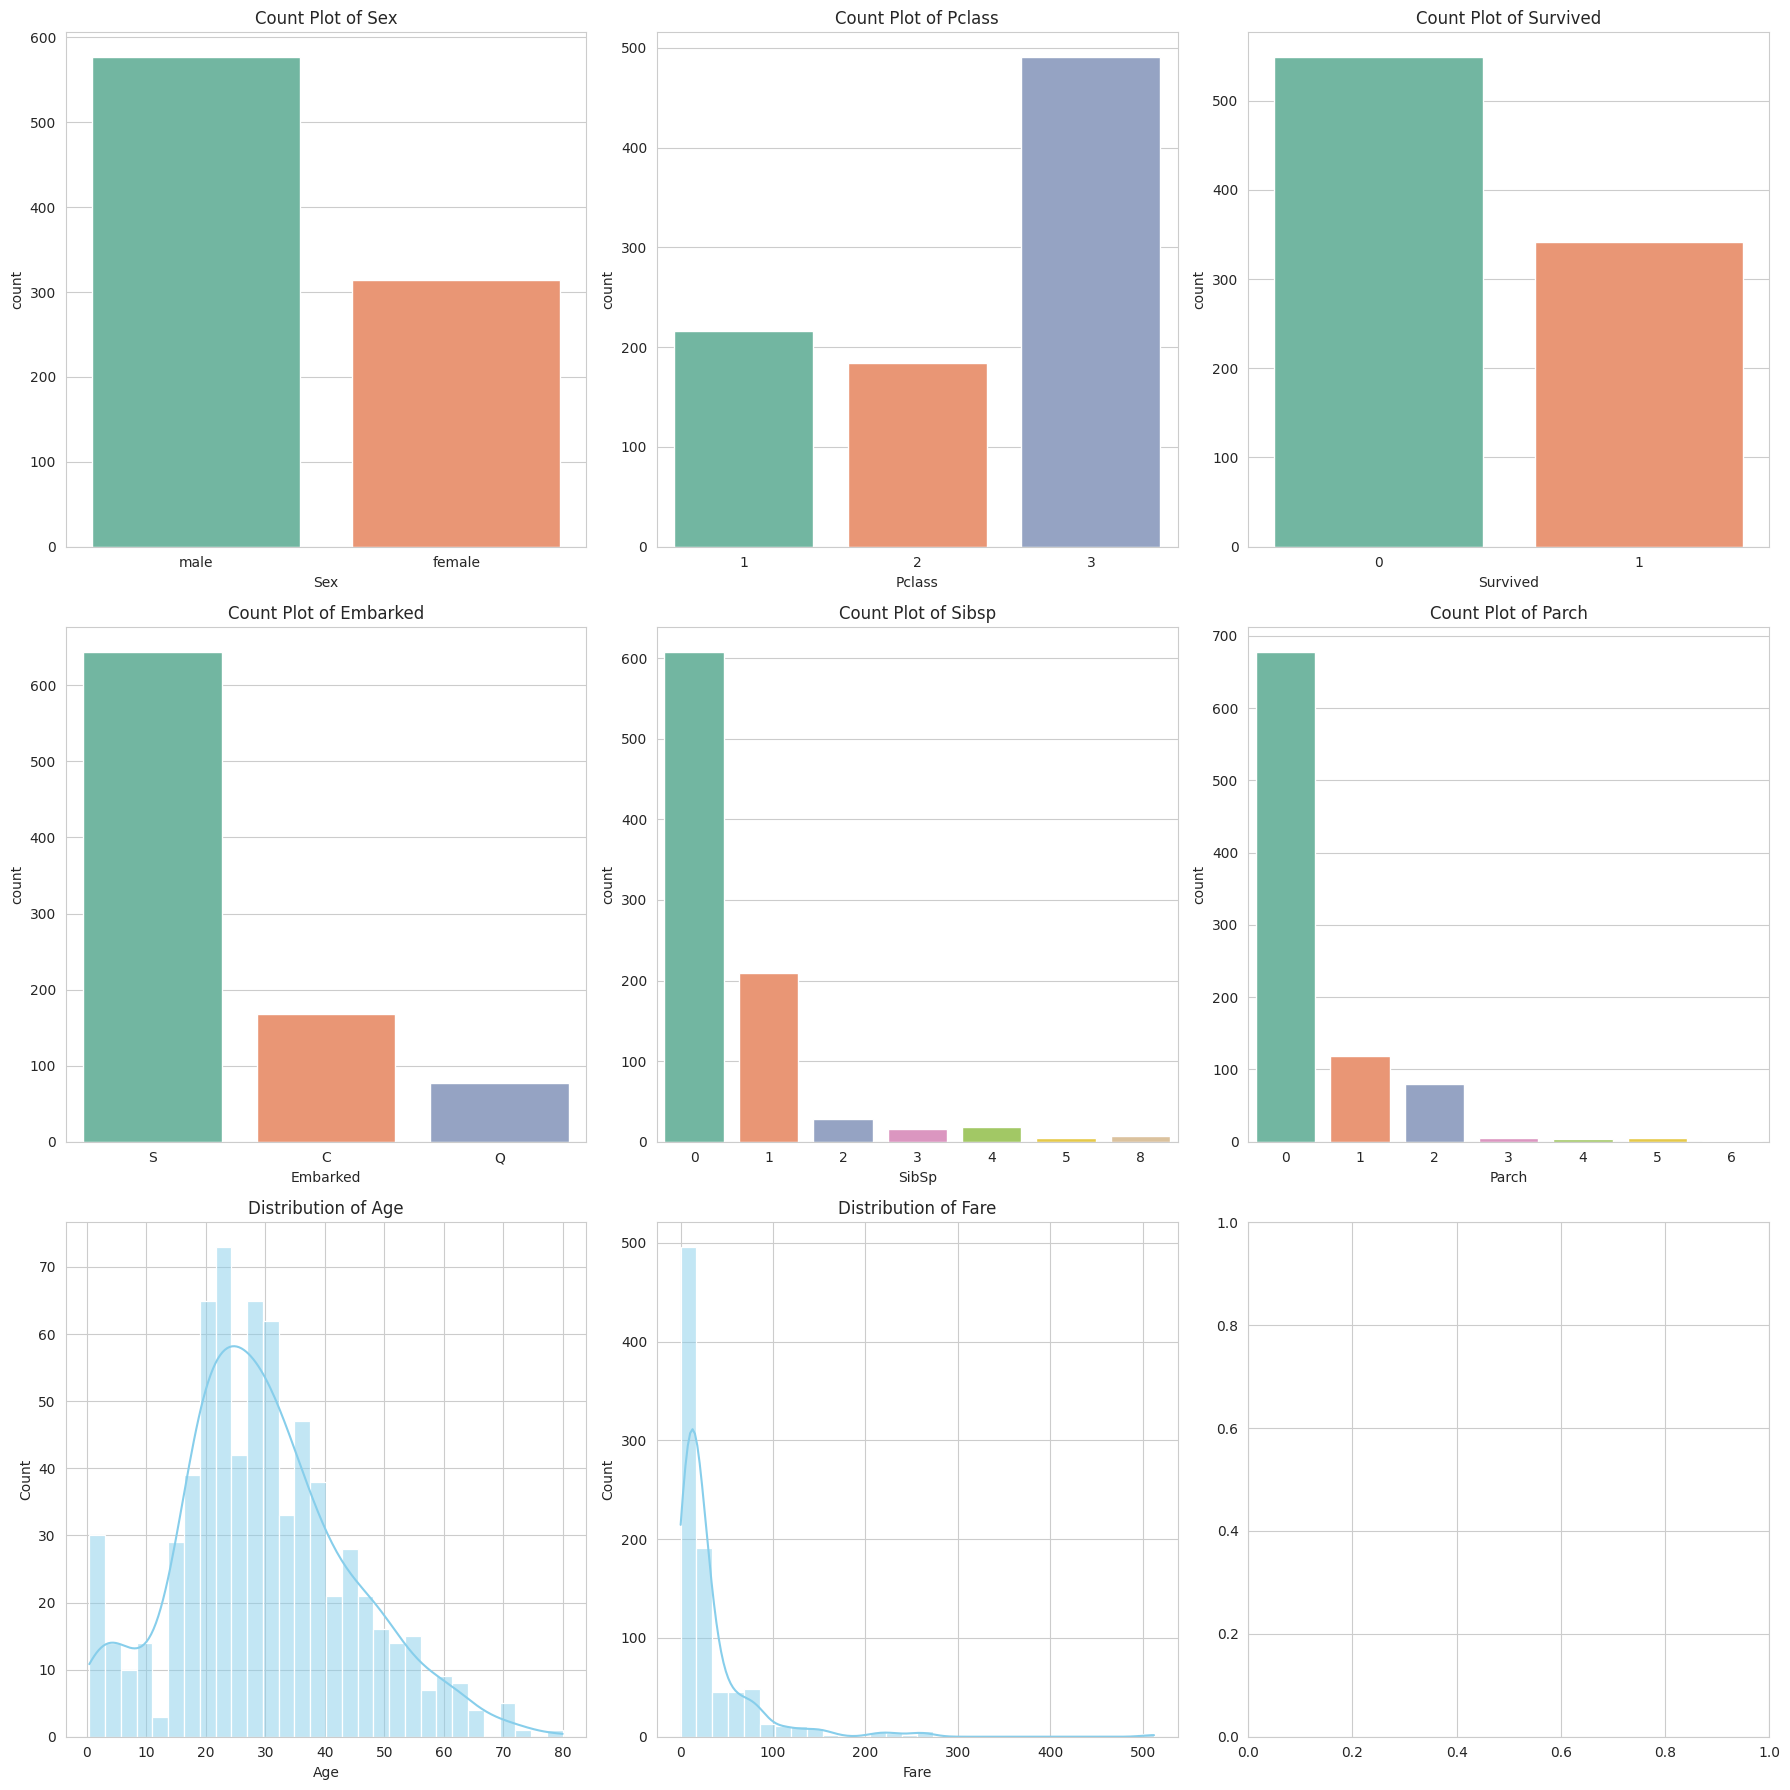

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure size and layout
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create count plots for categorical variables
for i, col in enumerate(['Sex','Pclass','Survived','Embarked','SibSp','Parch']):
    sns.countplot(x=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count Plot of {col.capitalize()}')

# Create histograms for numerical variables
for i, col in enumerate(['Age','Fare'],start=len(['Sex','Pclass','Survived','Embarked','SibSp','Parch'])):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col.capitalize()}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Insights:
1. There were more Males(64.76%) than Females(35.24%).
2. 55% of the people were in class 3. In class 1(20%) and in class 2(24%),there were almost equal number of people.
3. 62% of people did not survive.
4. 72.4% of people embarked from Southampton.
5. 68% had no siblings or spouses on board.
6. 76% had no parents or children on board.
7. Most of the people were in their 20s or 30s.

In [8]:
def percentage(column_name):
    return df[column_name].value_counts(normalize=True)*100

In [9]:
percentage('Sex'), percentage('Pclass'), percentage('Survived'),percentage('Embarked'), percentage('SibSp'), percentage('Parch')

(Sex
 male      64.758698
 female    35.241302
 Name: proportion, dtype: float64,
 Pclass
 3    55.106622
 1    24.242424
 2    20.650954
 Name: proportion, dtype: float64,
 Survived
 0    61.616162
 1    38.383838
 Name: proportion, dtype: float64,
 Embarked
 S    72.440945
 C    18.897638
 Q     8.661417
 Name: proportion, dtype: float64,
 SibSp
 0    68.237935
 1    23.456790
 2     3.142536
 4     2.020202
 3     1.795735
 8     0.785634
 5     0.561167
 Name: proportion, dtype: float64,
 Parch
 0    76.094276
 1    13.243547
 2     8.978676
 5     0.561167
 3     0.561167
 4     0.448934
 6     0.112233
 Name: proportion, dtype: float64)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

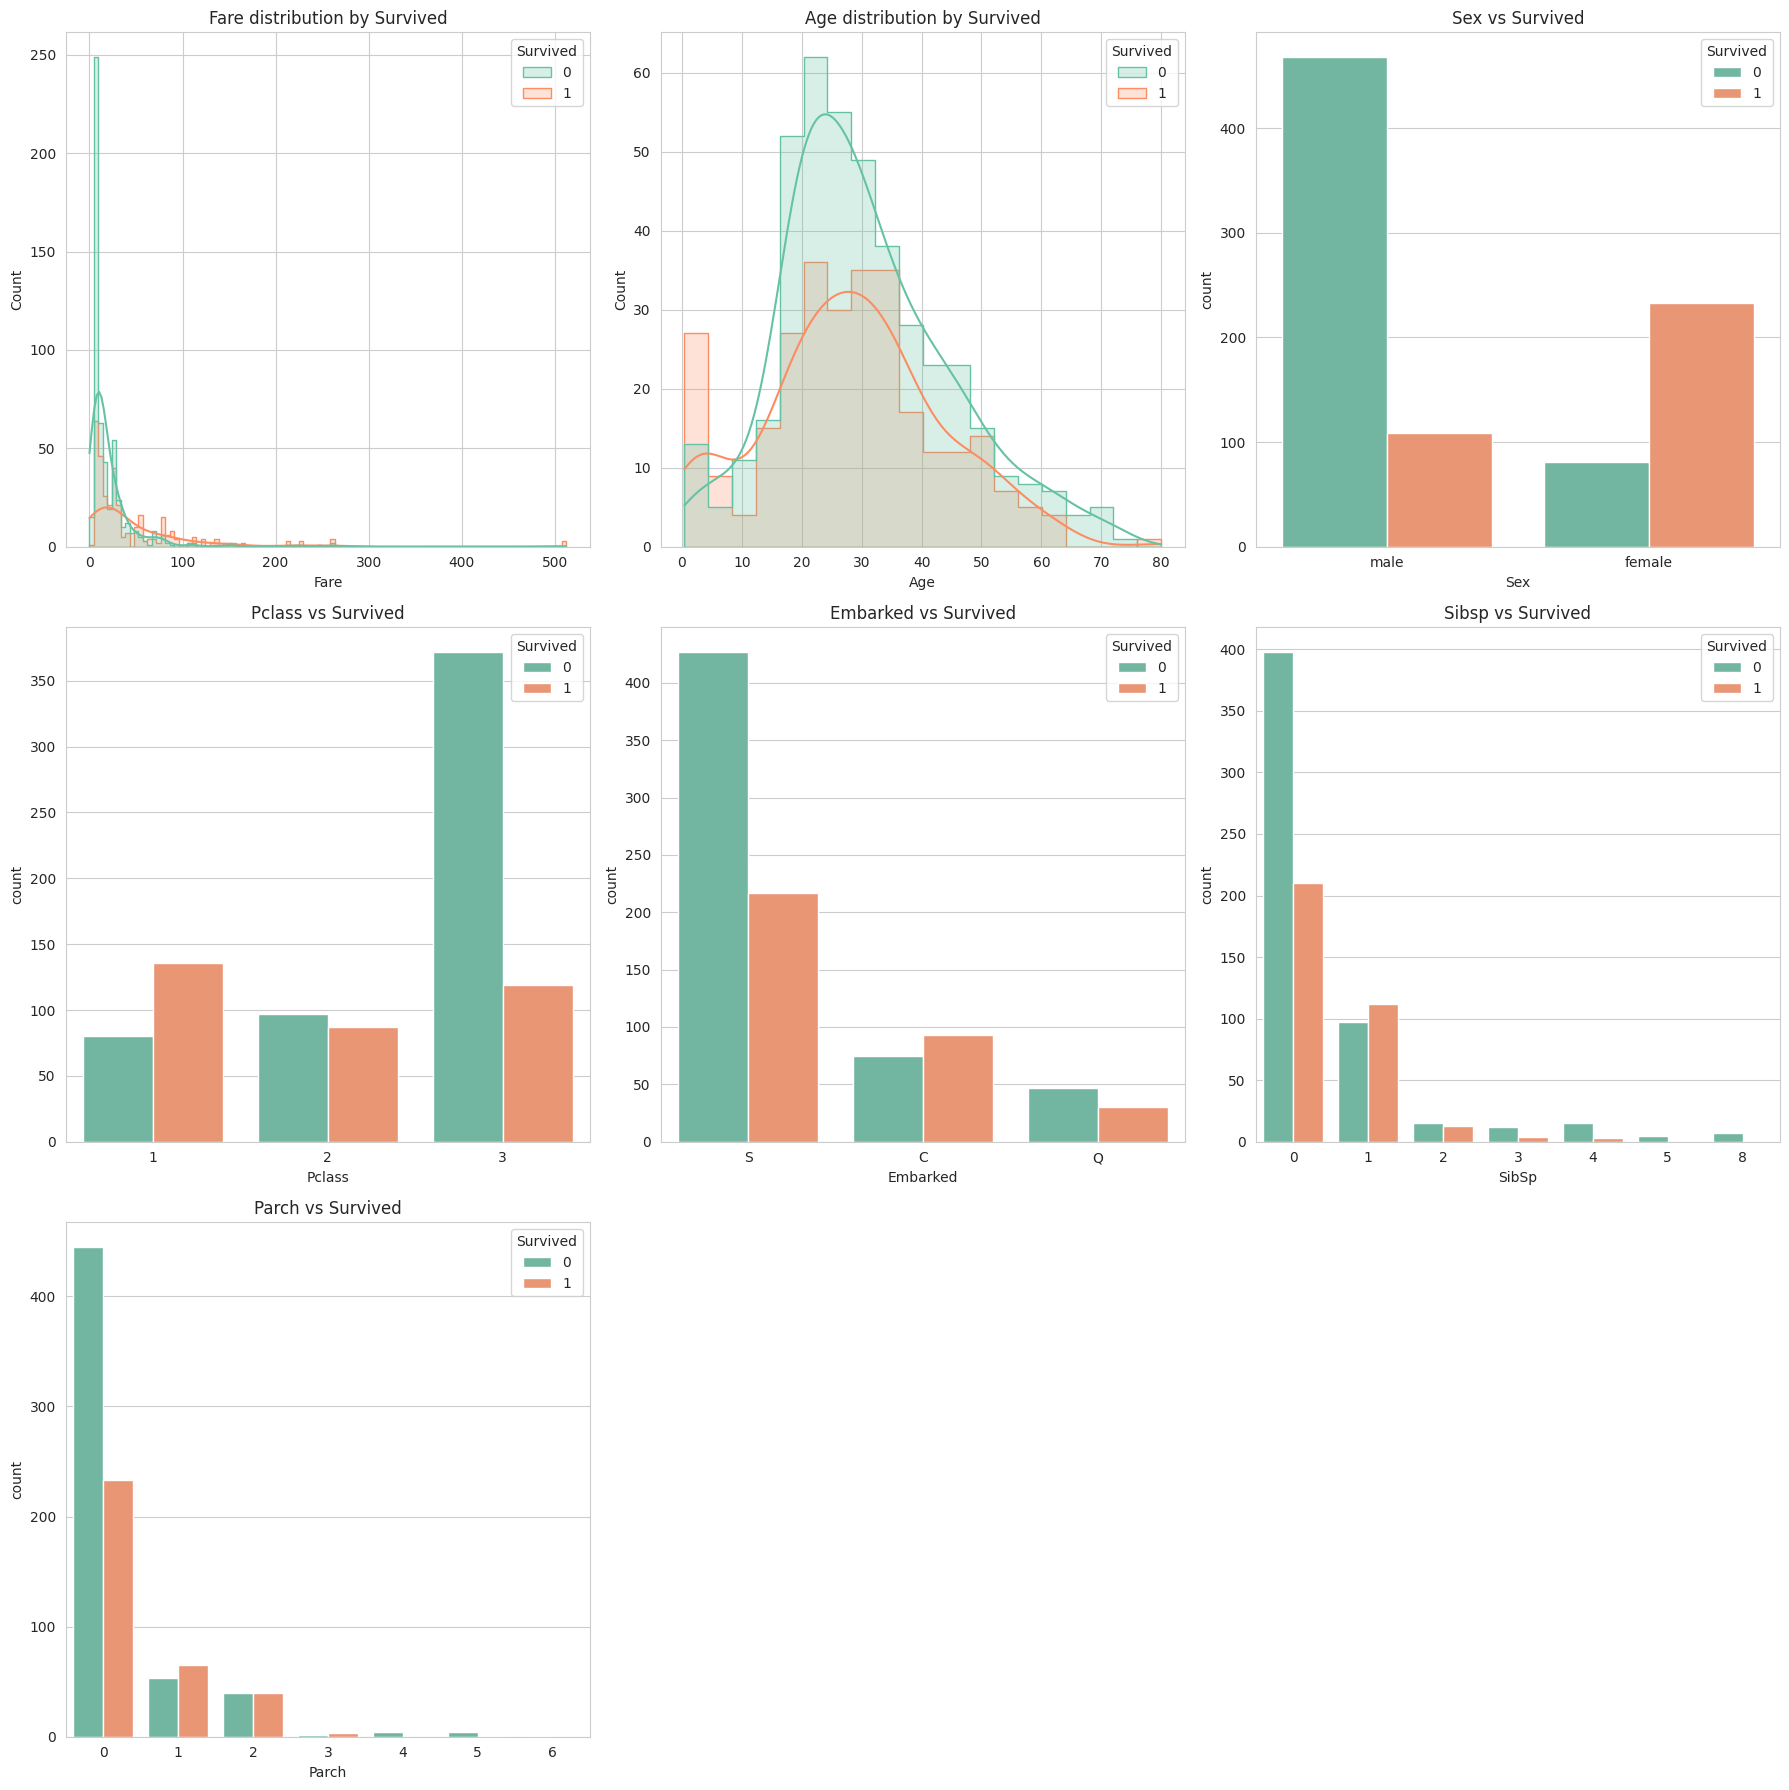

In [10]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure size and layout
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of numerical columns for histograms
histplot_columns = ['Fare', 'Age']

# Create histograms or KDE plots for numerical variables split by 'Survived'
for i, col in enumerate(histplot_columns):
    sns.histplot(data=df, x=col, hue='Survived', element='step', ax=axes[i], kde=True, palette='Set2')
    axes[i].set_title(f'{col.capitalize()} distribution by Survived')

# List of categorical columns for count plots
countplot_columns = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

# Create count plots for categorical variables showing 'Survived'
for i, col in enumerate(countplot_columns, start=len(histplot_columns)):
    sns.countplot(data=df, x=col, hue='Survived', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").capitalize()} vs Survived')

# Remove any unused subplots (if applicable)
for j in range(len(histplot_columns) + len(countplot_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [11]:
def calculate_percentages(df, column, target):
    counts = df.groupby(column)[target].value_counts().unstack().fillna(0)
    percentages = df.groupby(column)[target].value_counts(normalize=True).unstack().fillna(0) * 100
    return counts, percentages

In [12]:
calculate_percentages(df,'Sex','Survived') # Most of the females and few males survived. 

(Survived    0    1
 Sex               
 female     81  233
 male      468  109,
 Survived          0          1
 Sex                           
 female    25.796178  74.203822
 male      81.109185  18.890815)

In [13]:
calculate_percentages(df,'Pclass','Survived') #Most of the Class 1 members survived and most of the class 3 Members did not survive.

(Survived    0    1
 Pclass            
 1          80  136
 2          97   87
 3         372  119,
 Survived          0          1
 Pclass                        
 1         37.037037  62.962963
 2         52.717391  47.282609
 3         75.763747  24.236253)

In [14]:
calculate_percentages(df,'Embarked','Survived') # Most of the people from Southampton did not survive.

(Survived    0    1
 Embarked          
 C          75   93
 Q          47   30
 S         427  217,
 Survived          0          1
 Embarked                      
 C         44.642857  55.357143
 Q         61.038961  38.961039
 S         66.304348  33.695652)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

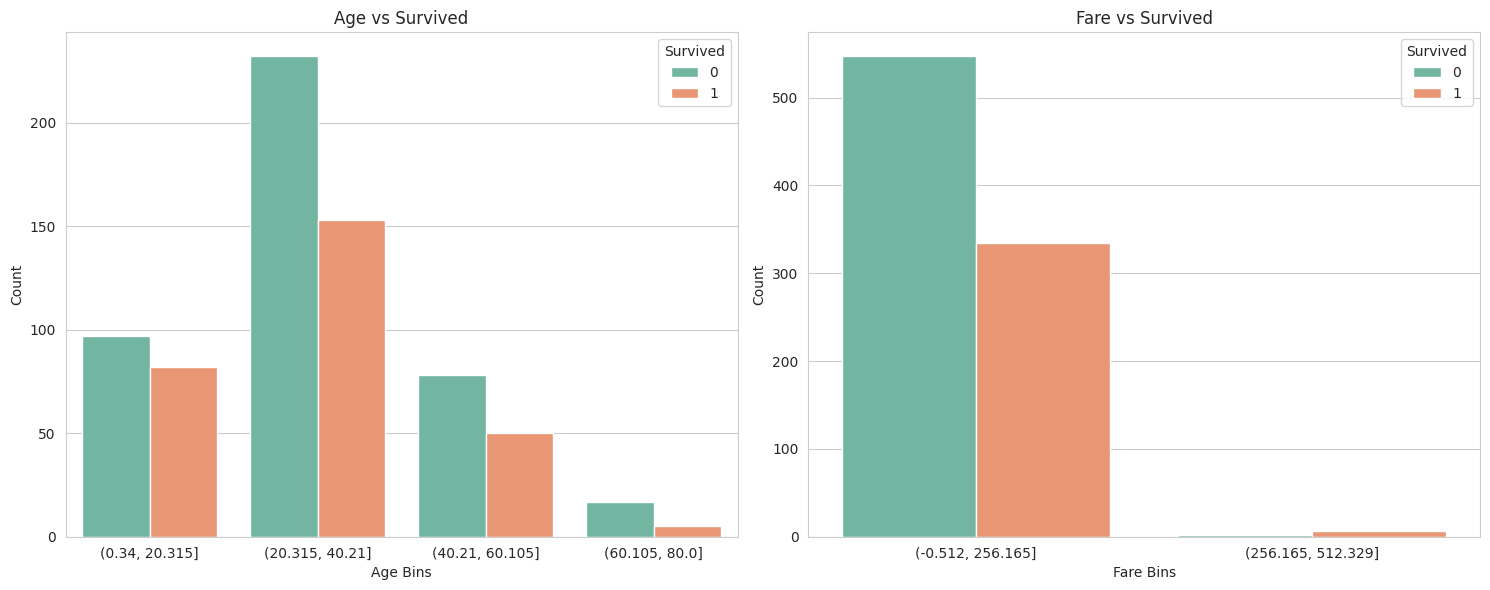

In [15]:
# Create bins for 'Age' and 'Fare' columns
age_bins = pd.cut(df['Age'], bins=4)  # Adjust the number of bins as needed
fare_bins = pd.cut(df['Fare'], bins=2)  # Adjust the number of bins as needed

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure size and layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create count plots for 'Age' and 'Fare' columns
sns.countplot(data=df, x=age_bins, hue='Survived', palette='Set2', ax=axes[0])
sns.countplot(data=df, x=fare_bins, hue='Survived', palette='Set2', ax=axes[1])

# Set titles and labels
axes[0].set_title('Age vs Survived')
axes[0].set_xlabel('Age Bins')
axes[0].set_ylabel('Count')
axes[1].set_title('Fare vs Survived')
axes[1].set_xlabel('Fare Bins')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
# Separate input and target variables
input_columns = [col for col in df.columns if col != 'Survived']
target_column = 'Survived'

# Training data
X_df = train_df[input_columns]
y_df = train_df[target_column]

#Validation data
X_val = val_df[input_columns]
y_val = val_df[target_column]

In [17]:
X_test = df1[input_columns]


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
categorical_columns = ['Pclass','Embarked']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_columns])
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))
X_df[encoded_cols] = encoder.transform(X_df[categorical_columns])
X_val[encoded_cols] = encoder.transform(X_val[categorical_columns])

In [20]:
X_train_new = X_df.drop(['PassengerId','Embarked_nan','Cabin','Name','Ticket','Embarked','Pclass'],axis=1)
X_val_new = X_val.drop(['PassengerId','Embarked_nan','Cabin','Name','Ticket','Embarked','Pclass'],axis=1)

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
numeric_columns = ['Age','Fare']
imputer = SimpleImputer(strategy = 'mean').fit(df[numeric_columns])
X_train_new[numeric_columns] = imputer.transform(X_train_new[numeric_columns])
X_val_new[numeric_columns] = imputer.transform(X_val_new[numeric_columns])

In [23]:
X_train_new

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
331,male,45.500000,0,0,28.5000,1.0,0.0,0.0,0.0,0.0,1.0
733,male,23.000000,0,0,13.0000,0.0,1.0,0.0,0.0,0.0,1.0
382,male,32.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
704,male,26.000000,1,0,7.8542,0.0,0.0,1.0,0.0,0.0,1.0
813,female,6.000000,4,2,31.2750,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
106,female,21.000000,0,0,7.6500,0.0,0.0,1.0,0.0,0.0,1.0
270,male,29.699118,0,0,31.0000,1.0,0.0,0.0,0.0,0.0,1.0
860,male,41.000000,2,0,14.1083,0.0,0.0,1.0,0.0,0.0,1.0
435,female,14.000000,1,2,120.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_val_new

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
709,male,29.699118,1,1,15.2458,0.0,0.0,1.0,1.0,0.0,0.0
439,male,31.000000,0,0,10.5000,0.0,1.0,0.0,0.0,0.0,1.0
840,male,20.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
720,female,6.000000,0,1,33.0000,0.0,1.0,0.0,0.0,0.0,1.0
39,female,14.000000,1,0,11.2417,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
433,male,17.000000,0,0,7.1250,0.0,0.0,1.0,0.0,0.0,1.0
773,male,29.699118,0,0,7.2250,0.0,0.0,1.0,1.0,0.0,0.0
25,female,38.000000,1,5,31.3875,0.0,0.0,1.0,0.0,0.0,1.0
84,female,17.000000,0,0,10.5000,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
# Convert 'Sex' column to 0 and 1
sex_mapping = {'male': 0, 'female': 1}
X_train_new['Sex'] = X_train_new['Sex'].map(sex_mapping)
X_val_new['Sex'] = X_val_new['Sex'].map(sex_mapping)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
numeric_columns = ['Age','Fare']
scaler = MinMaxScaler().fit(df[numeric_columns])
X_train_new.loc[:, numeric_columns] = scaler.transform(X_train_new[numeric_columns])
X_val_new.loc[:, numeric_columns] = scaler.transform(X_val_new[numeric_columns])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
model = LogisticRegression(solver='liblinear').fit(X_train_new, y_df)

In [30]:
model.score(X_train_new, y_df)

0.8061797752808989

In [31]:
model.score(X_val_new, y_val)

0.8044692737430168

In [32]:
# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 80.45%
Accuracy: 80.62%


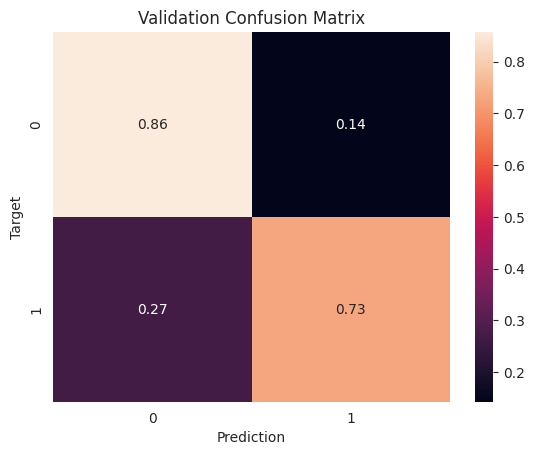

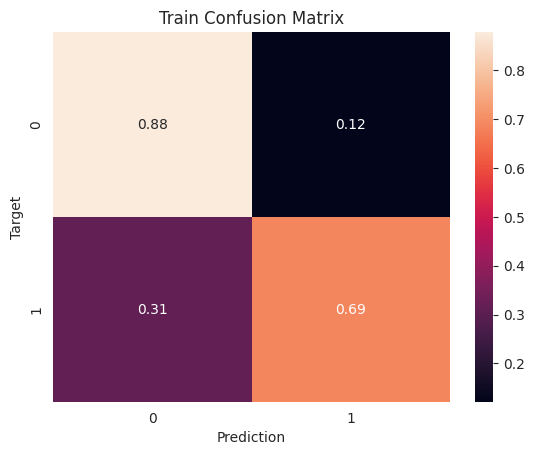

In [33]:
# Evaluate on validation and test set
val_preds = predict_and_plot(X_val_new, y_val, 'Validation')
train_preds = predict_and_plot(X_train_new, y_df, 'Train')

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(random_state = 42).fit(X_train_new ,y_df)

In [36]:
model.score(X_train_new ,y_df), model.score(X_val_new ,y_val)

(0.9803370786516854, 0.770949720670391)

In [37]:
from sklearn.tree import plot_tree, export_text

In [38]:
model.tree_.max_depth

21

In [39]:
importance_df = pd.DataFrame({
    'feature': list(X_train_new.columns),
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [40]:
importance_df

,feature,importance
0,Sex,0.308977
1,Age,0.234722
4,Fare,0.224381
7,Pclass_3,0.086574
2,SibSp,0.051675
3,Parch,0.037315
5,Pclass_1,0.020307
10,Embarked_S,0.012134
6,Pclass_2,0.011654
8,Embarked_C,0.011421


In [41]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md, random_state = 42)
    model.fit(X_train_new, y_df)
    train_acc = model.score(X_train_new, y_df)
    val_acc = model.score(X_val_new,y_val)
    return {'Max Depth': md , 'Training Accuracy': train_acc, 'Validation Accuracy' : val_acc}

In [42]:
Accuracy_df = pd.DataFrame([max_depth_error(md) for md in range(1,22)])

In [43]:
Accuracy_df 

,Max Depth,Training Accuracy,Validation Accuracy
0,1,0.787921,0.782123
1,2,0.803371,0.765363
2,3,0.834270,0.798883
3,4,0.839888,0.798883
4,5,0.851124,0.798883
5,6,0.866573,0.798883
6,7,0.882022,0.804469
7,8,0.894663,0.793296
8,9,0.907303,0.810056
9,10,0.915730,0.798883


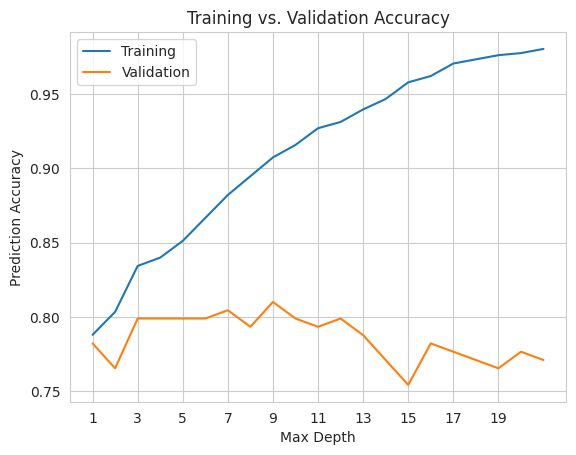

In [44]:
plt.figure()
plt.plot(Accuracy_df['Max Depth'], Accuracy_df['Training Accuracy'])
plt.plot(Accuracy_df['Max Depth'], Accuracy_df['Validation Accuracy'])
plt.title('Training vs. Validation Accuracy')
plt.xticks(range(1,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Accuracy')
plt.legend(["Training","Validation"]);

In [45]:
 max_depth_error(3),  max_depth_error(5),  max_depth_error(9)

({'Max Depth': 3,
  'Training Accuracy': 0.8342696629213483,
  'Validation Accuracy': 0.7988826815642458},
 {'Max Depth': 5,
  'Training Accuracy': 0.851123595505618,
  'Validation Accuracy': 0.7988826815642458},
 {'Max Depth': 9,
  'Training Accuracy': 0.9073033707865169,
  'Validation Accuracy': 0.8100558659217877})

In [46]:
# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Define a range for max_leaf_nodes to test
max_leaf_nodes_range = range(2, 200)

# Loop through different values of max_leaf_nodes
for max_leaf_nodes in max_leaf_nodes_range:
    # Train the model with the current max_leaf_nodes value
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train_new, y_df)
    
    # Predict on training set and validation set
    y_train_pred = model.predict(X_train_new)
    y_val_pred = model.predict(X_val_new)
    
    # Calculate the mean squared error for training and validation sets
    train_error = 1- model.score(X_train_new, y_df)
    val_error = 1- model.score(X_val_new,y_val)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

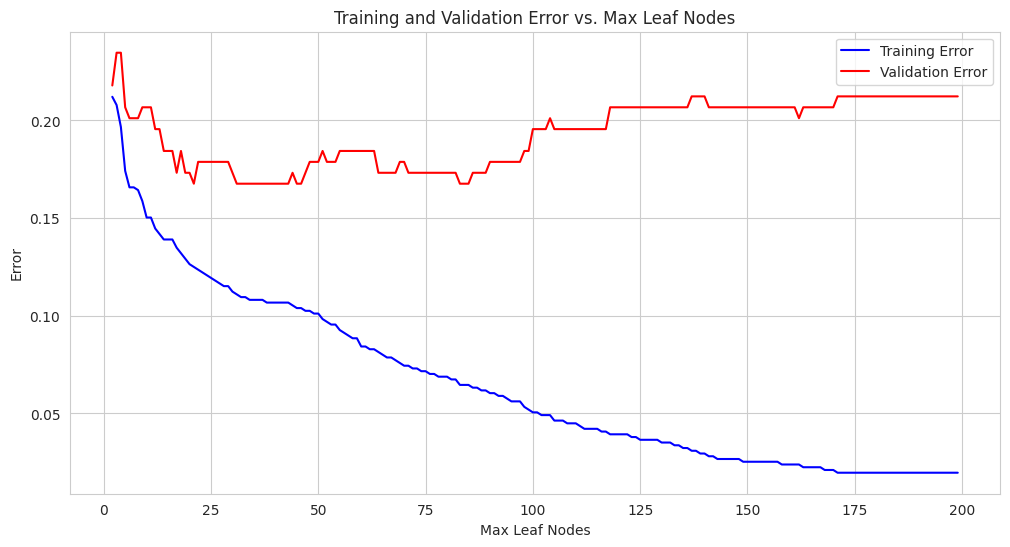

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(max_leaf_nodes_range, train_errors, label='Training Error', color='blue')
plt.plot(max_leaf_nodes_range, val_errors, label='Validation Error', color='red')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Max Leaf Nodes')
plt.legend()
plt.show()

In [48]:
model = DecisionTreeClassifier(max_leaf_nodes=22, random_state=42).fit(X_train_new, y_df)
model.score(X_train_new, y_df), model.score(X_val_new, y_val)

(0.8764044943820225, 0.8212290502793296)

In [49]:
#from sklearn.ensemble import RandomForestClassifier

In [50]:
#model = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_new, y_df)
#model.score(X_train_new, y_df), model.score(X_val_new, y_val)

importance_df = pd.DataFrame({
    'feature' : X_train_new.columns,
    'importance' : model.feature_importances_
}).sort_values('importance',ascending = False)

importance_df

In [51]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
# Preprocess the test data
X_test[encoded_cols] = encoder.transform(X_test[categorical_columns])
X_test_new = X_test.drop(['PassengerId','Embarked_nan','Cabin','Name','Ticket','Embarked','Pclass'], axis=1)
X_test_new[numeric_columns] = imputer.transform(X_test_new[numeric_columns])
X_test_new['Sex'] = X_test_new['Sex'].map(sex_mapping)
X_test_new.loc[:, numeric_columns] = scaler.transform(X_test_new[numeric_columns])

# Predict the survival on the test set
test_predictions = model.predict(X_test_new)

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': df1['PassengerId'],
    'Survived': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)